In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics

%matplotlib inline


In [2]:
house = pd.read_csv('kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
house.columns   # Columns in dataframe

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# dropping id and date columns as they are not useful for calculations
house = house.drop(['id', 'date'], axis=1)                   # axis=0 : x-axis (row)      axis=1: y-axis (column)

In [6]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


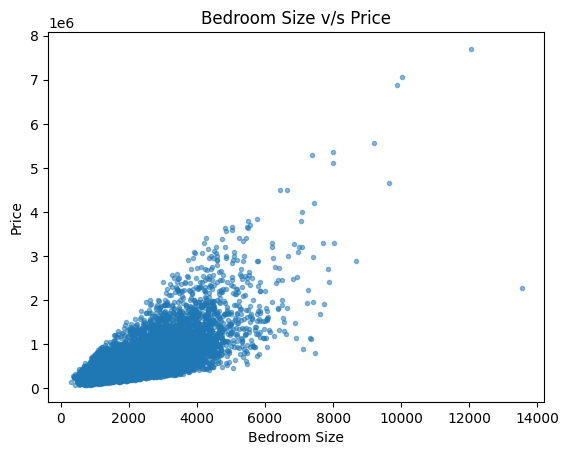

In [7]:
# Visulising data using scatter plot
plt.scatter(house['sqft_living'], house.price, alpha=0.5, marker='.')   # here, alpha sets the transparency of marker elements.  Bigger the alpha, more darker the elements.
plt.title('Bedroom Size v/s Price')
plt.xlabel('Bedroom Size')
plt.ylabel('Price')
plt.show()

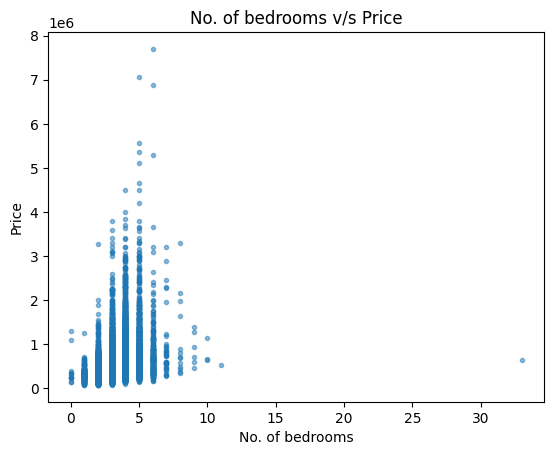

In [8]:
plt.scatter(house.bedrooms, house.price, alpha=0.5, marker='.')   # here, alpha sets the transparency of marker elements.  Bigger the alpha, more darker the elements.
plt.title('No. of bedrooms v/s Price')
plt.xlabel('No. of bedrooms')
plt.ylabel('Price')
plt.show()

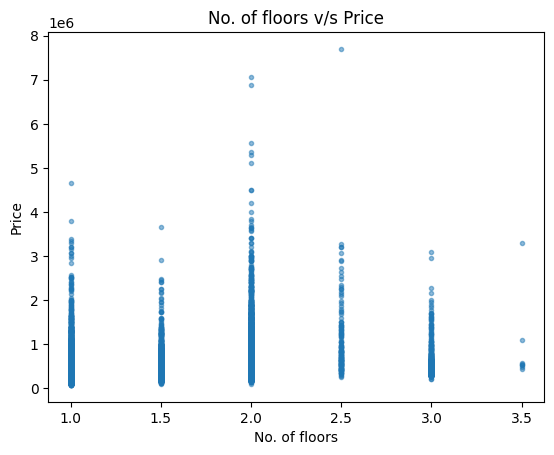

In [9]:
plt.scatter(house.floors, house.price, alpha=0.5, marker='.')   # here, alpha sets the transparency of marker elements.  Bigger the alpha, more darker the elements.
plt.title('No. of floors v/s Price')
plt.xlabel('No. of floors')
plt.ylabel('Price')
plt.show()

In [21]:
# PREPARING THE DATASET:

# first extract the target variable: which is house prices 

y= house.price.values

# now drop price out of dataframe and create a matrix out of house data
house = house.drop(['price'], axis=1)
x= np.matrix(house)



AttributeError: 'DataFrame' object has no attribute 'price'

In [23]:
# store column/feature names into a list 'colnames'
colnames = house.columns

In [24]:
colnames

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
# Training data : Actual dataset that we use to train the model. The model sees and learn from this data.

# Validation data : Sample of data used to provide an unbiased evaluation model fit on the training dataset while tuning the model hyperparameters.

In [26]:
# splitting the data into training and validation dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=3)   # train_test_split imported from sklearn.model_selection

# here, train_size= 0.8 means we want 80% of the data to be the training data and rest 20% to be the validation data
# random_state = should return the same random data specified in train_size (can be set to any number)

In [27]:
# TRAINING THE MODEL :

#Since there are multiple variables present in this model, we have the following hypothesis function for it: 

# h(x) = theta[0] + (theta[1] * x1) + (theta[2] * x2)

In [45]:
# Using linear regression:

x_train = np.asarray(x_train)  # convert x_train to a numpy array
y_train = np.asarray(y_train)  # convert y_train into a numpy array

# Normalize the input data
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)

lr = linear_model.LinearRegression()  # creates linear regression model,  linear_model imported from sklearn
lr.fit(x_train, y_train)


LinearRegression()

In [29]:
lr??              # gives info about lr after executing

In [47]:
# more ranking value = more contribution of variable in prediction

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [48]:
ranking(np.abs(lr.coef_), colnames)     

{'bedrooms': 0.06,
 'bathrooms': 0.07,
 'sqft_living': 0.0,
 'sqft_lot': 0.0,
 'floors': 0.01,
 'waterfront': 0.94,
 'view': 0.09,
 'condition': 0.04,
 'grade': 0.16,
 'sqft_above': 0.0,
 'sqft_basement': 0.0,
 'yr_built': 0.0,
 'yr_renovated': 0.0,
 'zipcode': 0.0,
 'lat': 1.0,
 'long': 0.35,
 'sqft_living15': 0.0,
 'sqft_lot15': 0.0}

In [50]:
# Convert x_test and x_train to numpy arrays
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

predictions = lr.predict(x_test)
test_error = metrics.mean_absolute_error(y_test, predictions) # imported from sklearn
print("Mean absolute error on test set", test_error)

predictions = lr.predict(x_train)
train_error = metrics.mean_absolute_error(y_train, predictions) # imported from sklearn
print("Mean absolute error on training set", train_error)

#The error message you encountered suggests that the np.matrix object is not supported in the predict method of the linear regression model. The error specifically asks you to convert the np.matrix object to a numpy array using np.asarray before passing it to the predict method.

Mean absolute error on test set 123368.26850172109
Mean absolute error on training set 127004.29297099903


In [51]:
# PREDICTION: 

index=4  # change index to see how it performs on other examples
check = x_train[index]
check= np.array(check).reshape(1,-1)

print("Predicted value: ", lr.predict(check))
print("True value: ", y_train[index])

Predicted value:  [445540.1181895]
True value:  499990.0


In [52]:
y.max(), y.min(), y.mean()

(7700000.0, 75000.0, 540088.1417665294)

In [53]:
x_train[index]

array([ 4.00000e+00,  2.75000e+00,  2.62000e+03,  7.00100e+03,
        2.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        8.00000e+00,  2.62000e+03,  0.00000e+00,  2.01200e+03,
        0.00000e+00,  9.80450e+04,  4.74838e+01, -1.21769e+02,
        2.62000e+03,  6.54300e+03])

In [54]:
house.iloc[index]

bedrooms             3.0000
bathrooms            2.0000
sqft_living       1680.0000
sqft_lot          8080.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                8.0000
sqft_above        1680.0000
sqft_basement        0.0000
yr_built          1987.0000
yr_renovated         0.0000
zipcode          98074.0000
lat                 47.6168
long              -122.0450
sqft_living15     1800.0000
sqft_lot15        7503.0000
Name: 4, dtype: float64

In [55]:
# CHECKING PREDICTION FOR HOUSE : 

# change the following values accordingly as per your house:

bedrooms       =   3.0000
bathrooms      =   2.0000
sqft_living    =   1680.0000
sqft_lot       =   8080.0000
floors         =   1.0000
waterfront     =   0.0000
view           =   0.0000
condition      =   3.0000
grade          =   8.0000
sqft_above     =   1680.0000
sqft_basement  =   0.0000
yr_built       =  1987.0000
yr_renovated   =   0.0000
zipcode        =  98074.0000
lat            =   47.6168
long           =   -122.0450
sqft_living15  =   1800.0000
sqft_lot15     =   7503.0000


#Creating array from the values taken
my_house=np.array([bedrooms,bathrooms, sqft_living, sqft_lot ,floors ,waterfront ,view ,condition,  grade,sqft_above,
          sqft_basement, yr_built, yr_renovated,zipcode, lat, long ,sqft_living15 ,sqft_lot15 ])

In [56]:
print("predicted Value:",lr.predict(my_house.reshape(1,-1))) #Predicting the value

predicted Value: [440695.20018507]
